Imports and Setup

In [1]:
import scipy
from scipy.integrate import quad
import numpy as np
import math
import matplotlib.pyplot as plt
import time

def complex_quadrature(func, a, b):
    def real_func(t):
        return np.real(func(t))
    def imag_func(t):
        return np.imag(func(t))
    real_integral = quad(real_func, a, b)
    imag_integral = quad(imag_func, a, b)
    return (real_integral[0] + 1j*imag_integral[0])

def FourierCoefficient(func, k, T):
    def integrand(t):
        return func(t) * np.exp(-1j * k * (2*math.pi / T) * t)
    res = complex_quadrature(integrand, 0, T)
    return (1/T) * res

def SynthesisEquation(fourierCoefficients, T, t, numCoef):
    sum = 0
    for k in range(0, numCoef):
        sum += fourierCoefficients[0][k] * np.exp(1j * -1 * k * (2*math.pi / T) * t)
    for k in range(1, numCoef):
        sum += fourierCoefficients[1][k] * np.exp(1j * k * (2*math.pi / T) * t)
    return sum

Set bounds and other properties

In [2]:
X_L = -100
X_R = 100
Y_T = 5
Y_B = -5
UPDATE_PERIOD = 0.25
NUM_COEF = 200
NUM_POINTS = 400

Run one of these blocks to pick an equation
- Make sure to set the correct fundamental period if the functions are changed

In [3]:
FUNDAMENTAL_PERIOD = 40
def Rect(t):
    if(abs(t % FUNDAMENTAL_PERIOD) < 10):
        return 1
    else:
        return 0
FUNC = Rect

In [ ]:

FUNDAMENTAL_PERIOD = 40
def RectSaw(t):
    relT = abs(t % FUNDAMENTAL_PERIOD)
    if(relT <= 20):
        return (1)
    elif(relT > 20):
        return (-1)
FUNC = RectSaw

In [ ]:
FUNDAMENTAL_PERIOD = 20
def Triangle(t):
    if(abs(t % FUNDAMENTAL_PERIOD) < 10):
        return (t % FUNDAMENTAL_PERIOD)
    else:
        return 0
FUNC = Triangle

In [ ]:
FUNDAMENTAL_PERIOD = 40
def IsocilesTriangle(t):
    relT = abs(t % FUNDAMENTAL_PERIOD)
    if(relT >= 10 and relT <= 20):
        return (relT - 10)
    elif(relT > 20 and relT <= 30):
        return (30 - relT)
    else:
        return 0
FUNC = IsocilesTriangle

In [ ]:
FUNDAMENTAL_PERIOD = 2 * math.pi
def Tangent(t):
    return np.tan(t)
FUNC = Tangent

In [ ]:
FUNDAMENTAL_PERIOD = 2 * math.pi
def AbsSin(t):
    FUNDAMENTAL_PERIOD = 10
    return np.abs(np.sin(t * (math.pi / 20)))
FUNC = AbsSin

Plot original equation

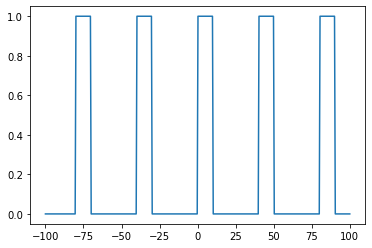

In [4]:
x = np.linspace(X_L, X_R, NUM_POINTS)
y2 = []
for xVal in x:
    y2.append(FUNC(xVal))

plt.plot(x, y2)
plt.show()

Compute coefficients

In [5]:
positiveCoefficients = []
negativeCoefficients = []
for i in range(0, NUM_COEF):
    positiveCoefficients.append(FourierCoefficient(FUNC, i, FUNDAMENTAL_PERIOD))
for i in range(0, NUM_COEF):
    negativeCoefficients.append(FourierCoefficient(FUNC, -1 * i, FUNDAMENTAL_PERIOD))

coefficientsPair = [negativeCoefficients, positiveCoefficients]

Plot synthesis equation

KeyboardInterrupt: 

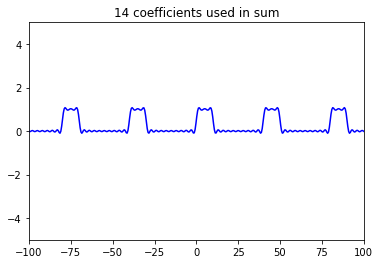

In [11]:
x = np.linspace(X_L, X_R, NUM_POINTS)
y1 = []
for xVal in x:
    y1.append(SynthesisEquation(coefficientsPair, FUNDAMENTAL_PERIOD, xVal, 1))

plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim =(X_L, X_R), ylim =(Y_B, Y_T))
line1, = ax.plot(x, np.real(y1), 'b-')


for numC in range(2, NUM_COEF):
    y1.clear()
    for xVal in x:
        y1.append(SynthesisEquation(coefficientsPair, FUNDAMENTAL_PERIOD, xVal, numC))
    line1.set_ydata(np.real(y1))
    text = (str(numC) + " coefficients used in sum")
    ax.set_title(text)
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(UPDATE_PERIOD)